In [1]:
"""
Loan Approval Prediction using Decision Tree & Random Forest
Author: Shalini Saurav
Description:
    This script predicts loan approval status based on applicant details.
    It includes data preprocessing, model training, evaluation, and saving.
"""

'\nLoan Approval Prediction using Decision Tree & Random Forest\nAuthor: Shalini Saurav\nDescription:\n    This script predicts loan approval status based on applicant details.\n    It includes data preprocessing, model training, evaluation, and saving.\n'

In [3]:
#  Step 1: Import Libraries =====

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pickle

In [23]:
#  Step 2: Load Dataset =====

df = pd.read_csv("loan_approval_dataset.csv")
print("\nDataset Preview:")
print(df.head())


Dataset Preview:
   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0       

In [9]:
#  Step 3: Handle Missing Values =====

num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include='object').columns

for col in num_cols:
    df[col].fillna(df[col].mean(), inplace=True)

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

/var/folders/zj/fvzff7016w55p1n0gpfspfyh0000gn/T/ipykernel_3197/324406084.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/var/folders/zj/fvzff7016w55p1n0gpfspfyh0000gn/T/ipykernel_3197/324406084.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

In [15]:
print(df.columns)

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


In [53]:
# 4.1. Clean column names

df.columns = df.columns.str.strip()

In [55]:
# 4.2. Remove extra spaces from string values

for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()

In [57]:
# 4.3. Define target column

target_column = "loan_status"
X = df.drop(target_column, axis=1)
y = df[target_column]

In [59]:
# 4.4. Encode categorical columns in X

le = LabelEncoder()
for col in X.select_dtypes(include='object').columns:
    X[col] = le.fit_transform(X[col])

In [61]:
# 4.5. Encode target column if needed

if y.dtype == 'object':
    y = le.fit_transform(y)

In [63]:
# 4.6. Feature scaling

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [65]:
# Step 6: Train-Test Split =====

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
# Step 7: Model Training =====

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [69]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [71]:
# Step 8: Model Evaluation =====

print("\nDecision Tree Results:")
y_pred_dt = dt_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Results:
Accuracy: 0.9742388758782201
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       536
           1       0.96      0.97      0.97       318

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



In [73]:
print("\nRandom Forest Results:")
y_pred_rf = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Results:
Accuracy: 0.9765807962529274
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       536
           1       0.97      0.97      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854



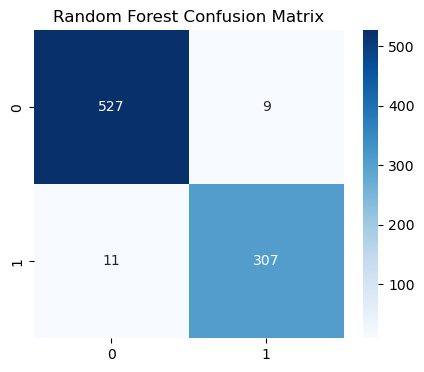

In [75]:
# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.show()

In [77]:
# Step 9: Save the Best Model =====

with open("loan_model.pkl", "wb") as file:
    pickle.dump(rf_model, file)

print("\nModel saved as 'loan_model.pkl'")


Model saved as 'loan_model.pkl'
